# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from apis_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabou
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | chernyshevskiy
Processing Record 5 of Set 1 | port saint john's
Processing Record 6 of Set 1 | san antonio de pale
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | sandacho
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | isl

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [6]:
# Display sample data
city_data_df.head(14)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tabou,4.4230,-7.3528,24.33,82,83,2.53,CI,1719641037
1,punta arenas,-53.1500,-70.9167,-0.94,86,75,3.09,CL,1719641039
2,utrik,11.2278,169.8474,27.94,83,97,7.02,MH,1719641040
3,chernyshevskiy,63.0128,112.4714,28.79,40,54,2.02,RU,1719641042
4,port saint john's,-31.6229,29.5448,17.79,49,7,3.16,ZA,1719641044
5,san antonio de pale,-1.4014,5.6325,23.62,90,94,4.60,GQ,1719641046
6,port-aux-francais,-49.3500,70.2167,1.28,78,76,18.63,TF,1719641048
7,port elizabeth,-33.9180,25.5701,20.16,63,0,2.57,ZA,1719641049
8,olonkinbyen,70.9221,-8.7187,1.88,94,100,5.22,SJ,1719641051
9,georgetown,5.4112,100.3354,31.97,56,40,4.12,MY,1719641053


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tabou,4.4230,-7.3528,24.33,82,83,2.53,CI,1719641037
1,punta arenas,-53.1500,-70.9167,-0.94,86,75,3.09,CL,1719641039
2,utrik,11.2278,169.8474,27.94,83,97,7.02,MH,1719641040
3,chernyshevskiy,63.0128,112.4714,28.79,40,54,2.02,RU,1719641042
4,port saint john's,-31.6229,29.5448,17.79,49,7,3.16,ZA,1719641044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

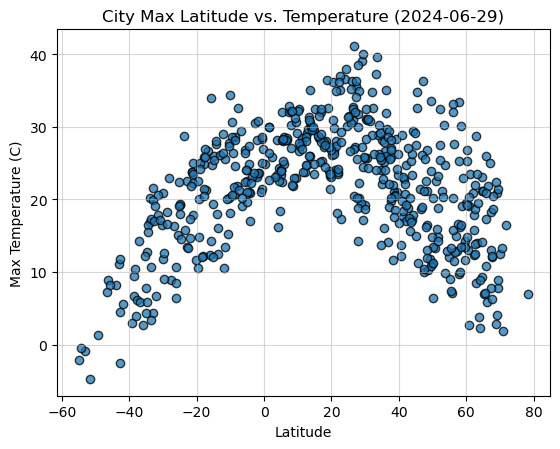

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

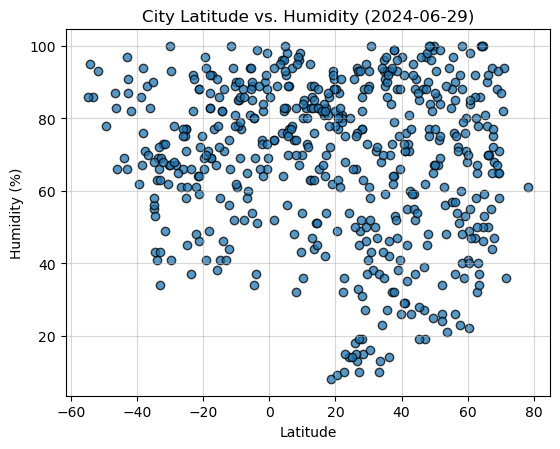

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

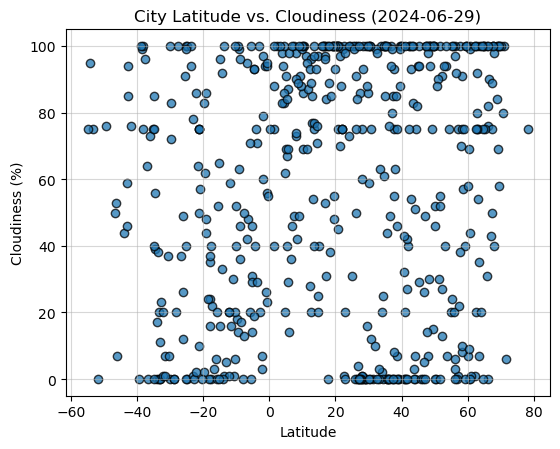

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

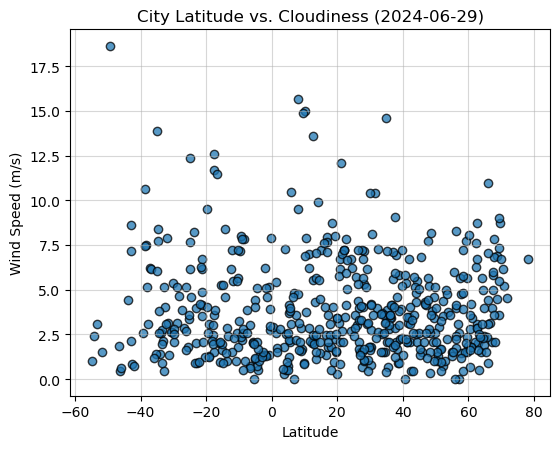

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Cloudiness (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values):
    
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    line = slope * x_values + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.figure(figsize=(5.7,4.6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, line, "r-")
    plt.annotate(line_eq,(x_values.min()+2,y_values.max()-2),fontsize=10,color="red") # Couldn't figure out how to do a loc=best type of thing here

    plt.xlabel("Latitude")
    plt.ylabel(f"{y_column}")
    plt.title(f"Latitude vs {y_column}")
    print(f"R squared is: {rvalue**2}")
    plt.tight_layout()
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tabou,4.4230,-7.3528,24.33,82,83,2.53,CI,1719641037
2,utrik,11.2278,169.8474,27.94,83,97,7.02,MH,1719641040
3,chernyshevskiy,63.0128,112.4714,28.79,40,54,2.02,RU,1719641042
8,olonkinbyen,70.9221,-8.7187,1.88,94,100,5.22,SJ,1719641051
9,georgetown,5.4112,100.3354,31.97,56,40,4.12,MY,1719641053


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,-0.94,86,75,3.09,CL,1719641039
4,port saint john's,-31.6229,29.5448,17.79,49,7,3.16,ZA,1719641044
5,san antonio de pale,-1.4014,5.6325,23.62,90,94,4.60,GQ,1719641046
6,port-aux-francais,-49.3500,70.2167,1.28,78,76,18.63,TF,1719641048
7,port elizabeth,-33.9180,25.5701,20.16,63,0,2.57,ZA,1719641049


###  Temperature vs. Latitude Linear Regression Plot

R squared is: 0.3560873609543357


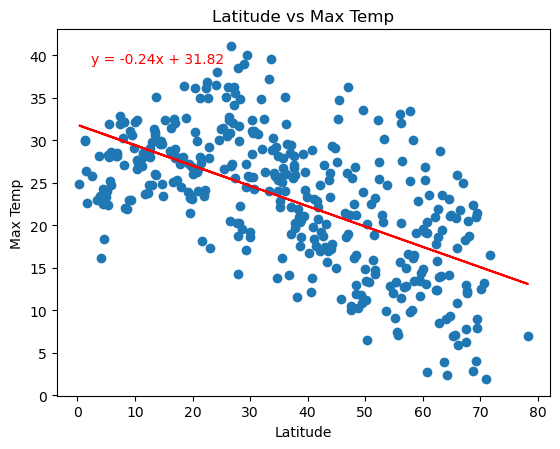

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_column = northern_hemi_df.columns[3]

lin_regress(x_values,y_values)

R squared is: 0.5914886537591068


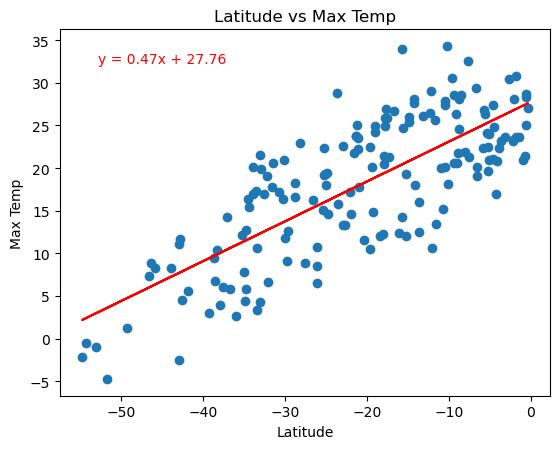

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_column = northern_hemi_df.columns[3]
lin_regress(x_values,y_values)

**Discussion about the linear relationship:** Latitude and Max Temp appear to have a positive relationship/corelation in the Southern hemisphere where temp increases as it approaches the equator (latitude = 0). Similarly, in the Northern hemisphere the relationship is similar, with temp decreasing as it moves away from the equator. This is because the x axis is increasing in degrees which is moving away from the equator. The r- squared for the Southern hemisphere is also closer to 1 than to 0 and this suggests that linear regression model is a stronger "predictor" (but not perfect). This means that the residual (difference between the actual and predicted values) is smaller. You can see how the scatter plot data closely surrounds the linear regression line in the Southern hemisphere. The Northen hemisphere's r- squared value is not so strong and you can see that the data sits further away from the regression line and so the model is weaker there.

### Humidity vs. Latitude Linear Regression Plot

R squared is: 0.006942254221699419


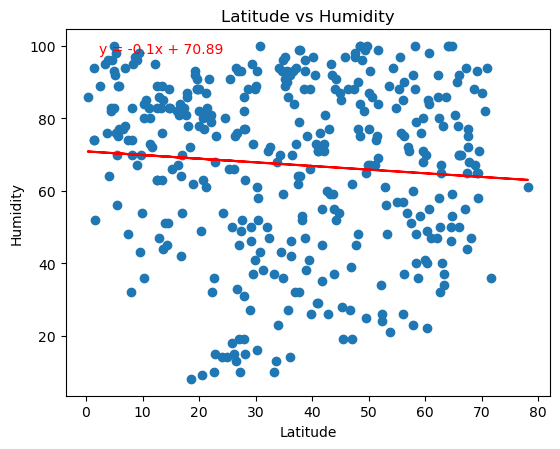

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_column = northern_hemi_df.columns[4]
lin_regress(x_values,y_values)

R squared is: 0.0011239984994739461


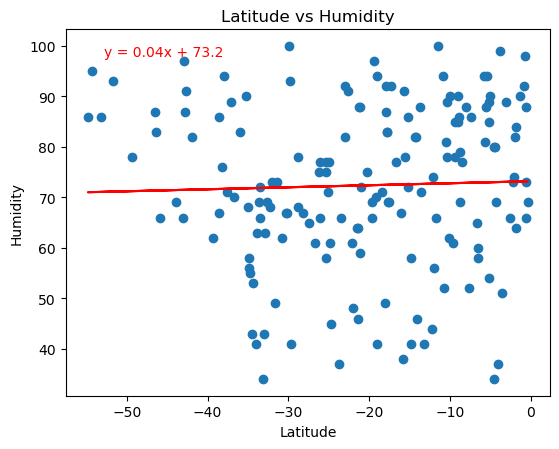

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_column = northern_hemi_df.columns[4]
lin_regress(x_values,y_values)

**Discussion about the linear relationship:** Latitude and Humidity appear to have no real relationship in that there is no corelation with very weak slopes for both Northen and Southern hemispheres, increasing modestly as they approach the equator (latitude = 0). The r- squareds are both closer to 0 and this suggests that the linear regression model is a very weak "predictor". This means that the residual (difference between the actual and predicted values) is greater. You can see how the scatter plot data is randomly placed across the graphs.

### Cloudiness vs. Latitude Linear Regression Plot

R squared is: 0.011995495789683782


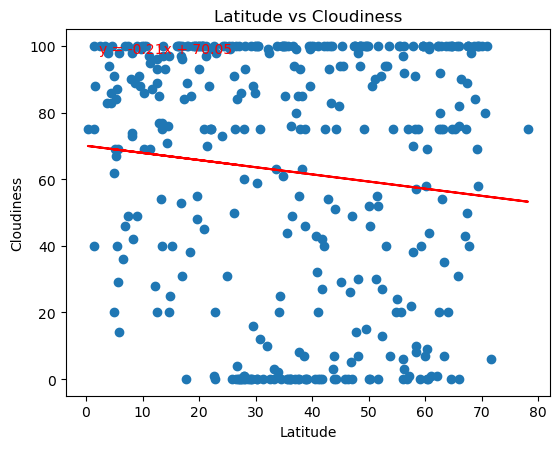

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_column = northern_hemi_df.columns[5]
lin_regress(x_values,y_values)

R squared is: 0.0009168086650362202


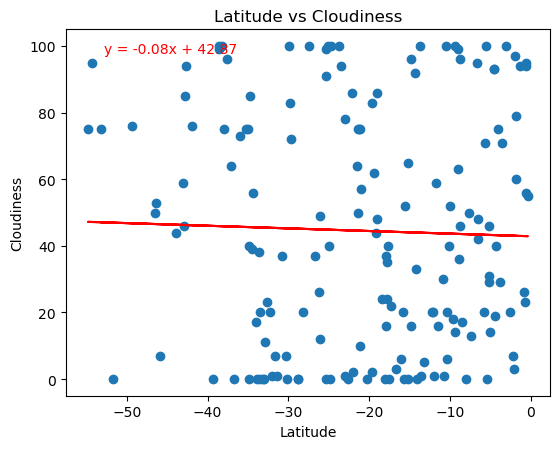

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_column = northern_hemi_df.columns[5]
lin_regress(x_values,y_values)

**Discussion about the linear relationship:** Latitude and Cloudiness also appear to have no real relationship in that there is no corelation with very weak slopes for both Northen and Southern hemispheres, with an inverse relationship as they approach the equator (latitude = 0). The r- squareds are both closer to 0 and this suggests that the linear regression model is a very weak "predictor". This means that the residual (difference between the actual and predicted values) is greater. You can see how the scatter plot data is randomly placed across the graphs.

### Wind Speed vs. Latitude Linear Regression Plot

R squared is: 0.00044536650476881


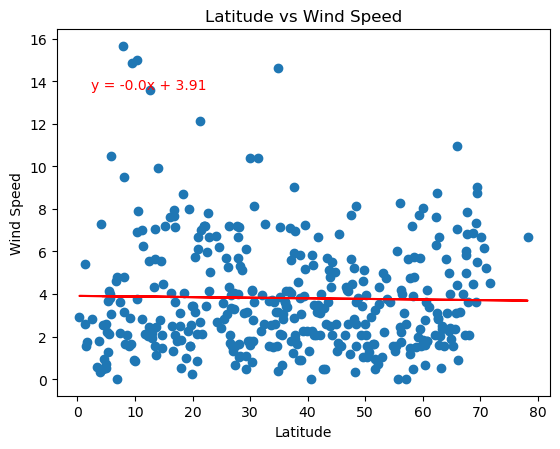

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_column = northern_hemi_df.columns[6]
lin_regress(x_values,y_values)

R squared is: 0.021553606949440297


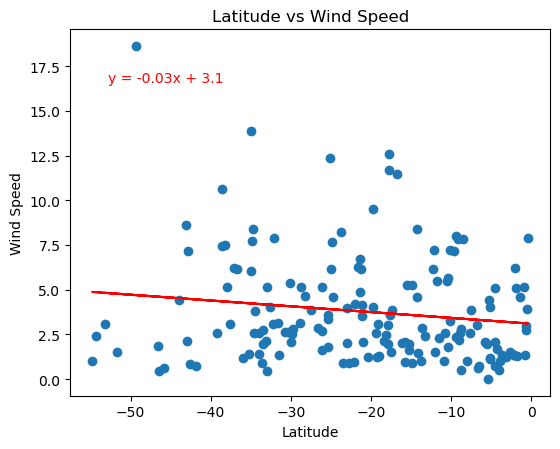

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_column = northern_hemi_df.columns[6]
lin_regress(x_values,y_values)

**Discussion about the linear relationship:** Latitude and Wind Speed also appear to have no real relationship in that there is no corelation with no slopes for both Northen hemisphere and a very small slope Southern hemispheres where wind speed appears to decrease as it approaches the equator (latitude = 0). The r- squareds are both closer to 0 and this suggests that the linear regression model is a very weak "predictor". This means that the residual (difference between the actual and predicted values) is greater. Even though the data surrounds the linear regression model line, the majority of the data points lie further away from it.